In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./US_Accidents_Dec20_updated.csv')

In [3]:
df.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10148   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  

[5 rows x 47 columns]

In [4]:
df.select_dtypes(include = ['Int64','float64','int64']).dtypes

Severity               int64
Start_Lat            float64
Start_Lng            float64
End_Lat              float64
End_Lng              float64
Distance(mi)         float64
Number               float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
dtype: object

In [6]:
df.Severity.value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

In [12]:
Weather_conditions = ['Temperature(F)','Pressure(in)','Visibility(mi)','Precipitation(in)']

In [22]:
def UVA_Numeric(data,var_group):
    
    size = len(var_group)
    plt.figure(figsize = (9*size,12), dpi =140)
    
    for j,i in enumerate(var_group):
        
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurtosis = data[i].kurtosis()
        
        points = mean - st_dev,mean+ st_dev
        
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade =True)
        sns.scatterplot([mini,maxi],[0,0],color ='red',label = 'min/max')
        sns.scatterplot(mean,[0],color ='blue',label ='mean')
        sns.scatterplot(median,[0],color ='black',label = 'median')
        sns.lineplot(points,[0,0],color='yellow',label ='std')
        plt.xlabel('{}'.format(i),fontsize =20)
        plt.ylabel('density')
        plt.tight_layout()
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurtosis,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

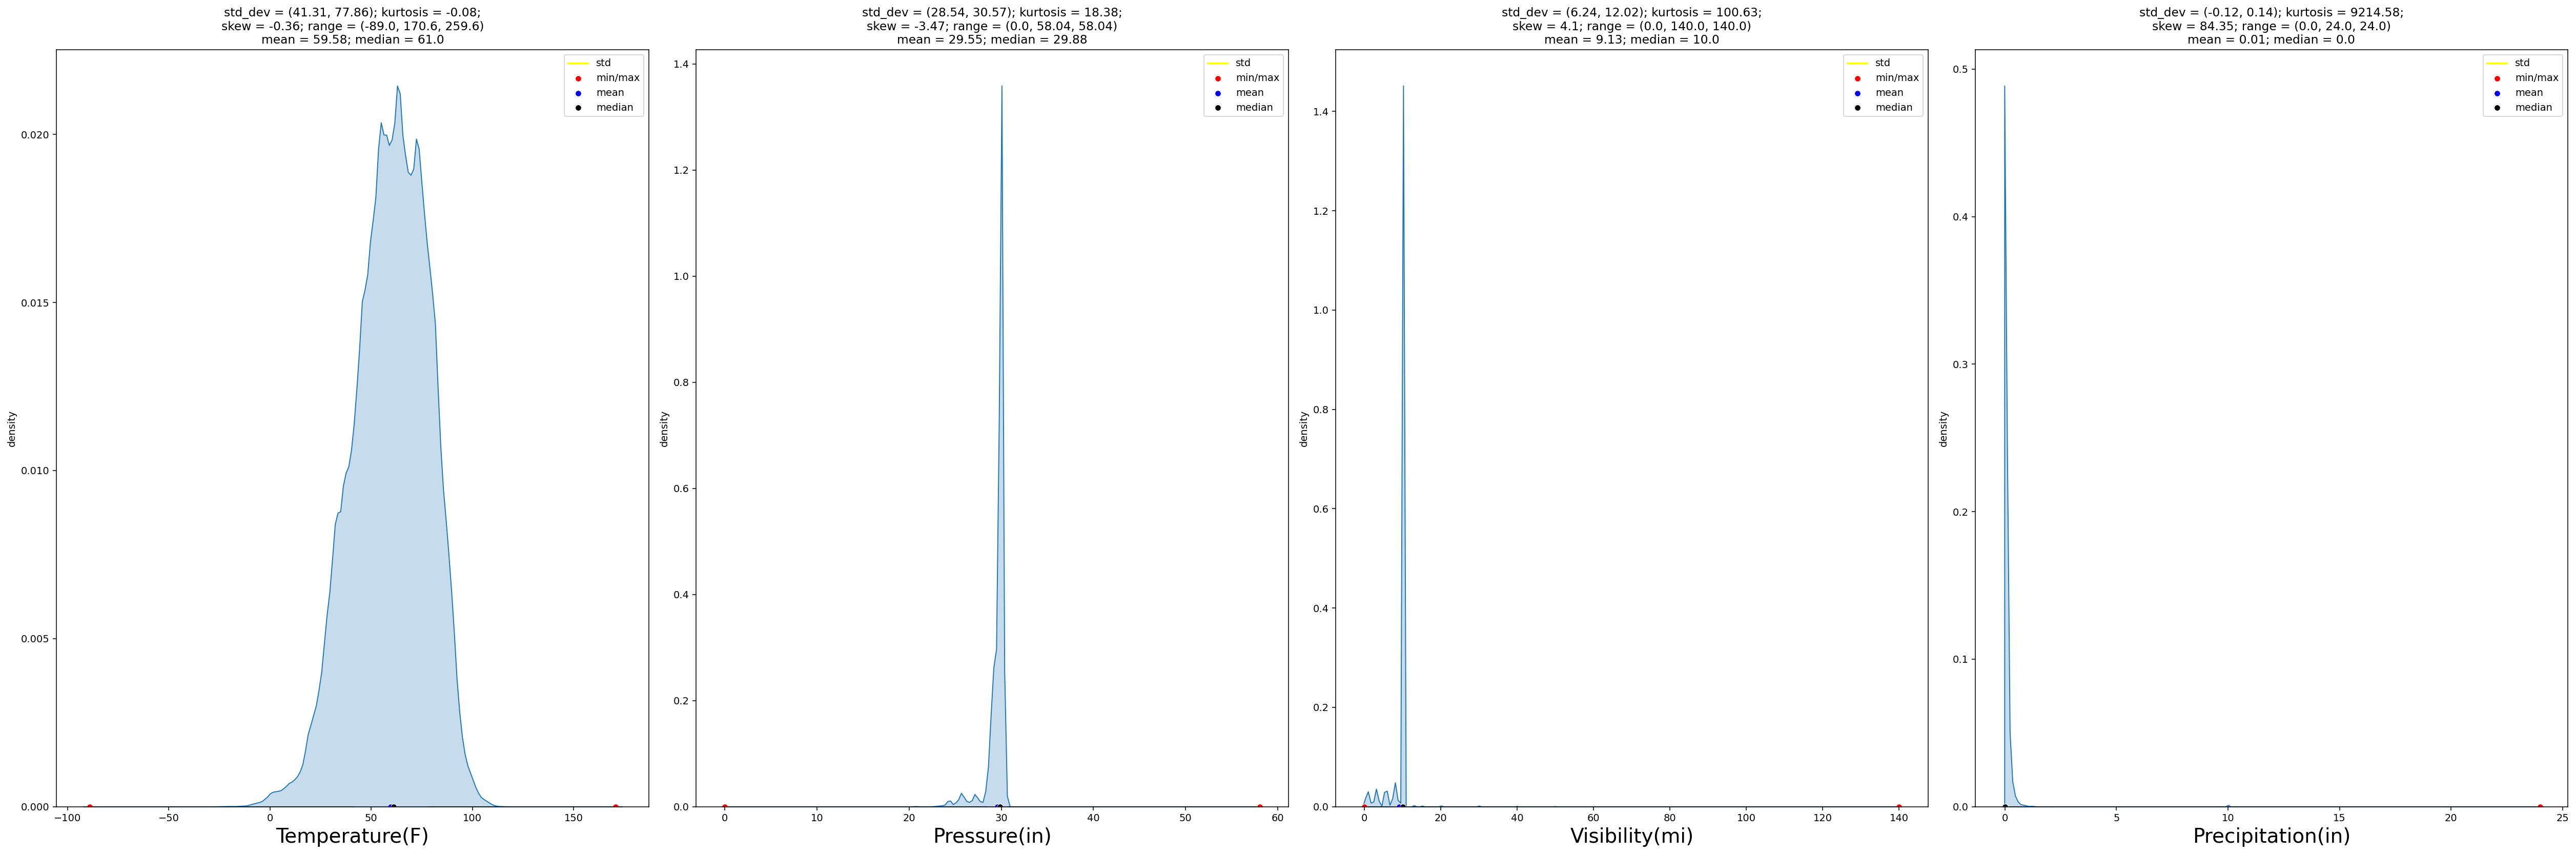

In [23]:
UVA_Numeric(df,Weather_conditions)

#### Temperature
- Distribution looks fairly symmetrical with a mean of 59.58(F) and median of 61(F), std deviation of 18.27(F).
- There is a slight hint of left skewness which could be confirmed with the skew value of -0.36 and the fact that Median > Mean.
- The curve looks Mesokurtic and the same could be adjudged by the Kurtosis value of -0.08.
- Range of Temperature is quite big, spans over -89(F) to +170(F).

#### Pressure
- The distribution is heavily left skewed, the same is evident in the skew value of -3.47.
- The curve is Leptokurtic, the values are more concentrated at the mean, Kurtosis is very high at 18.
- Range spans from 0 - 58 atms.

#### Visibility
- The distribution is right skewed with a skewness quotient of 4.1.
- The curve is Leptokurtic, lot of values are concentrated at the mean, Kurtosis is extremely high at 100.
- Range spans from 0 -140 miles.

#### Precipitation
- The distribution is heavily skewed towards right
- A mean and a median of 0.01 and 0.0 respectively confirms that the data is from a time frame when there was very little rain.
- Curve is Leptokurtic again, values are more concentrated at the mean.

## Identifying Outliers

In [55]:
def UVA_outlier(data, var_group, include_outlier = True):
 

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  

  for j,i in enumerate(var_group):
    
    
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
     
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


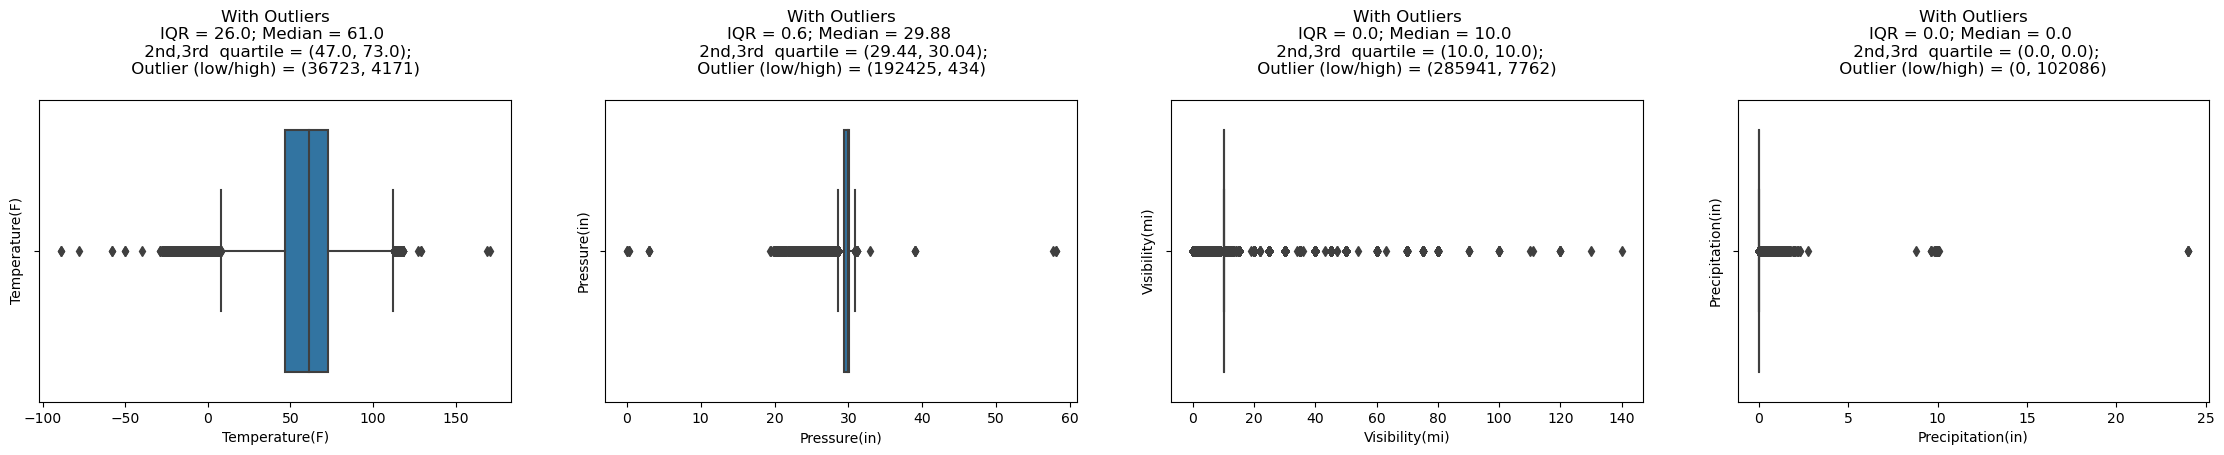

In [58]:
UVA_outlier(df,Weather_conditions)

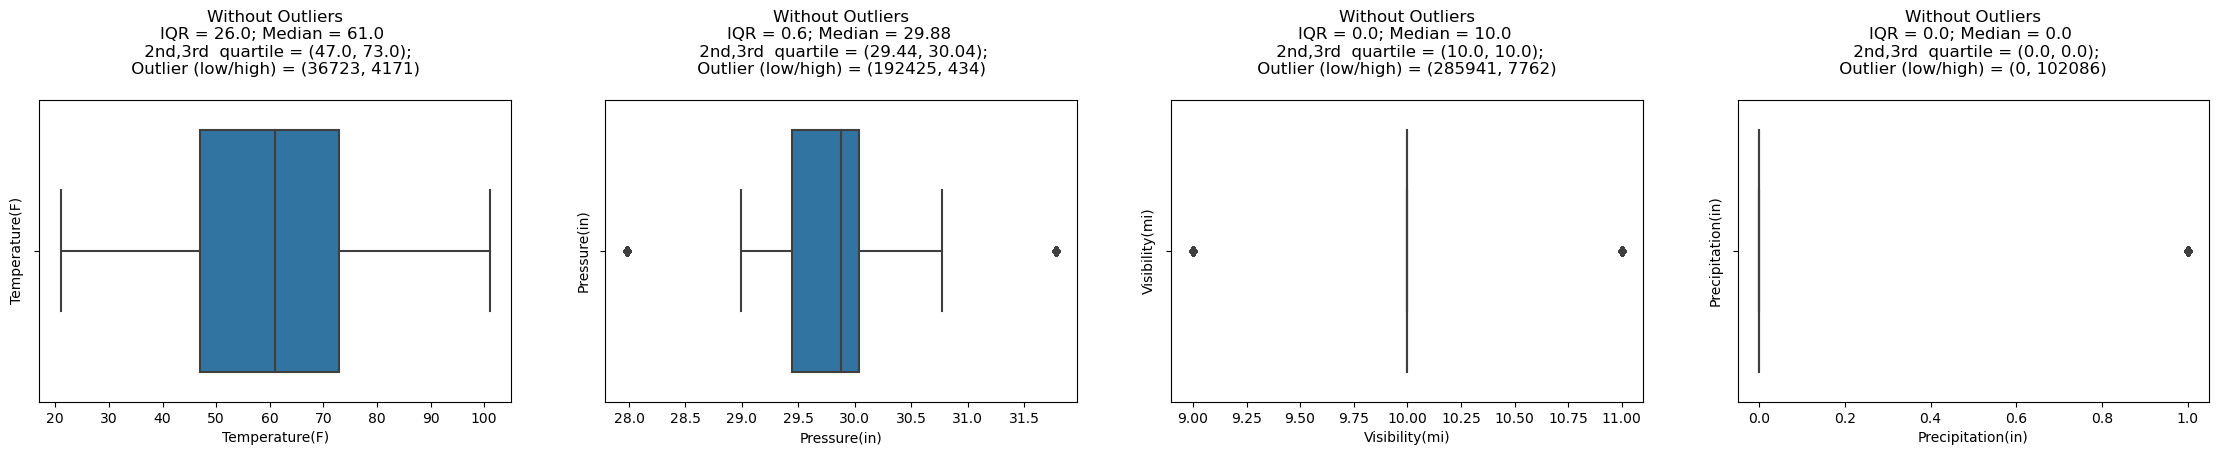

In [57]:
UVA_outlier(df,Weather_conditions, include_outlier= False)

In [29]:
df.select_dtypes(include = ['object','bool']).dtypes

ID                       object
Start_Time               object
End_Time                 object
Description              object
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Wind_Direction           object
Weather_Condition        object
Amenity                    bool
Bump                       bool
Crossing                   bool
Give_Way                   bool
Junction                   bool
No_Exit                    bool
Railway                    bool
Roundabout                 bool
Station                    bool
Stop                       bool
Traffic_Calming            bool
Traffic_Signal             bool
Turning_Loop               bool
Sunrise_Sunset           object
Civil_Twilight           object
Nautical

In [50]:
# Creating segments to categorize Objects and Boolean Dtypes

Traffic_Management_Intersections = ['Bump','Crossing','No_Exit','Roundabout']
Traffic_Management_Barriers = ['Stop','Traffic_Signal','Turning_Loop']
Demographics = ['City','County','State','Country']


df['Stop'] = df['Stop'].astype('category')
df['Traffic_Signal'] = df['Traffic_Signal'].astype('category')
df['Turning_Loop'] = df['Turning_Loop'].astype('category')
df['City'] = df['City'].astype('category')
df['County'] = df['County'].astype('category')
df['State'] = df['State'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Bump'] = df['Bump'].astype('category')
df['Crossing'] = df['Crossing'].astype('category')
df['No_Exit'] = df['No_Exit'].astype('category')
df['Roundabout'] = df['Roundabout'].astype('category')

In [51]:
def UVA_Category(data, var_group):

 
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)


  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

 
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

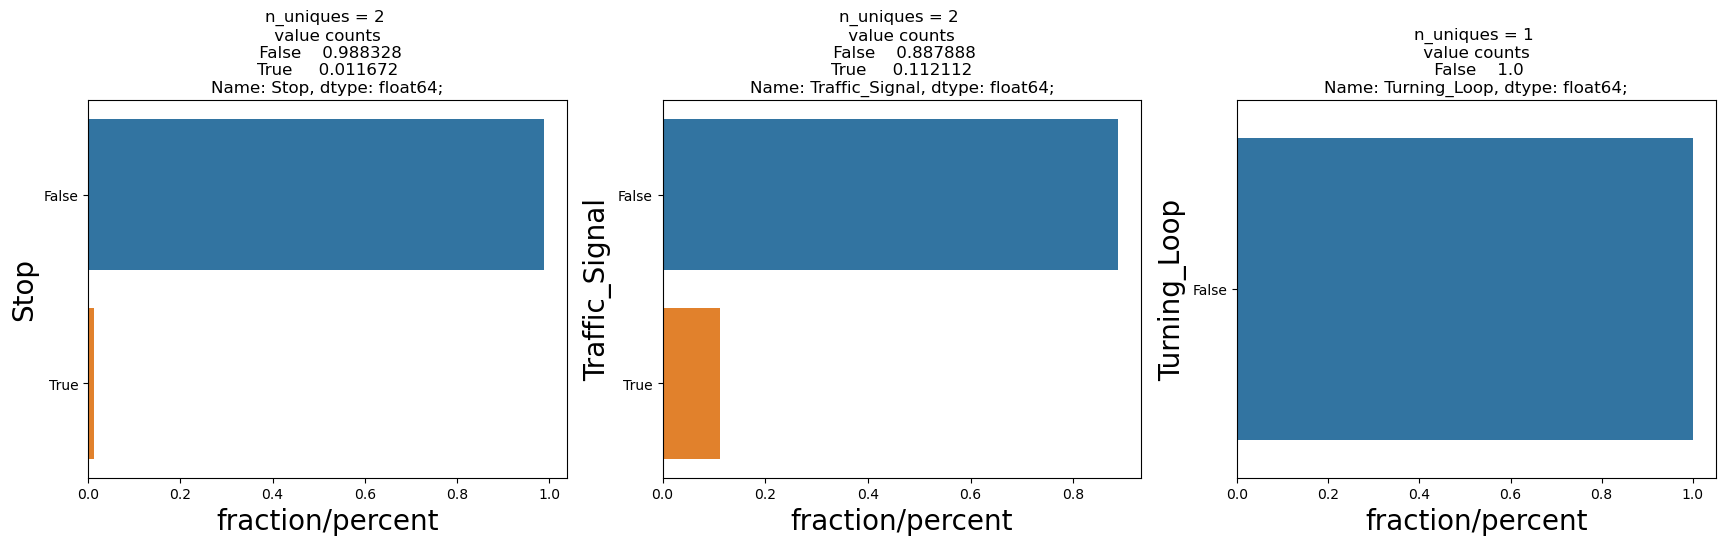

In [52]:
UVA_Category(df,Traffic_Management_Barriers)

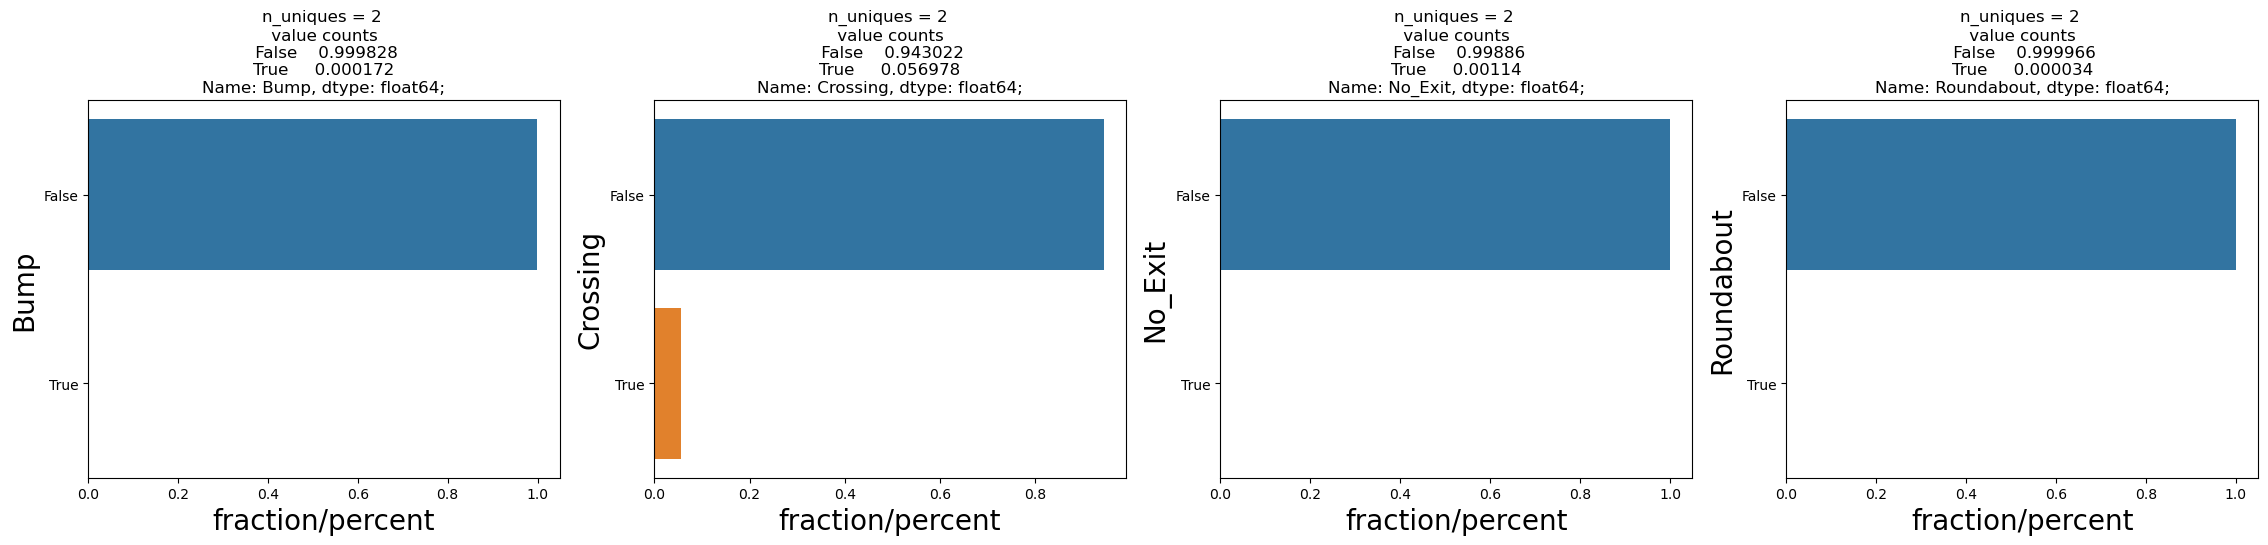

In [53]:
UVA_Category(df,Traffic_Management_Intersections)

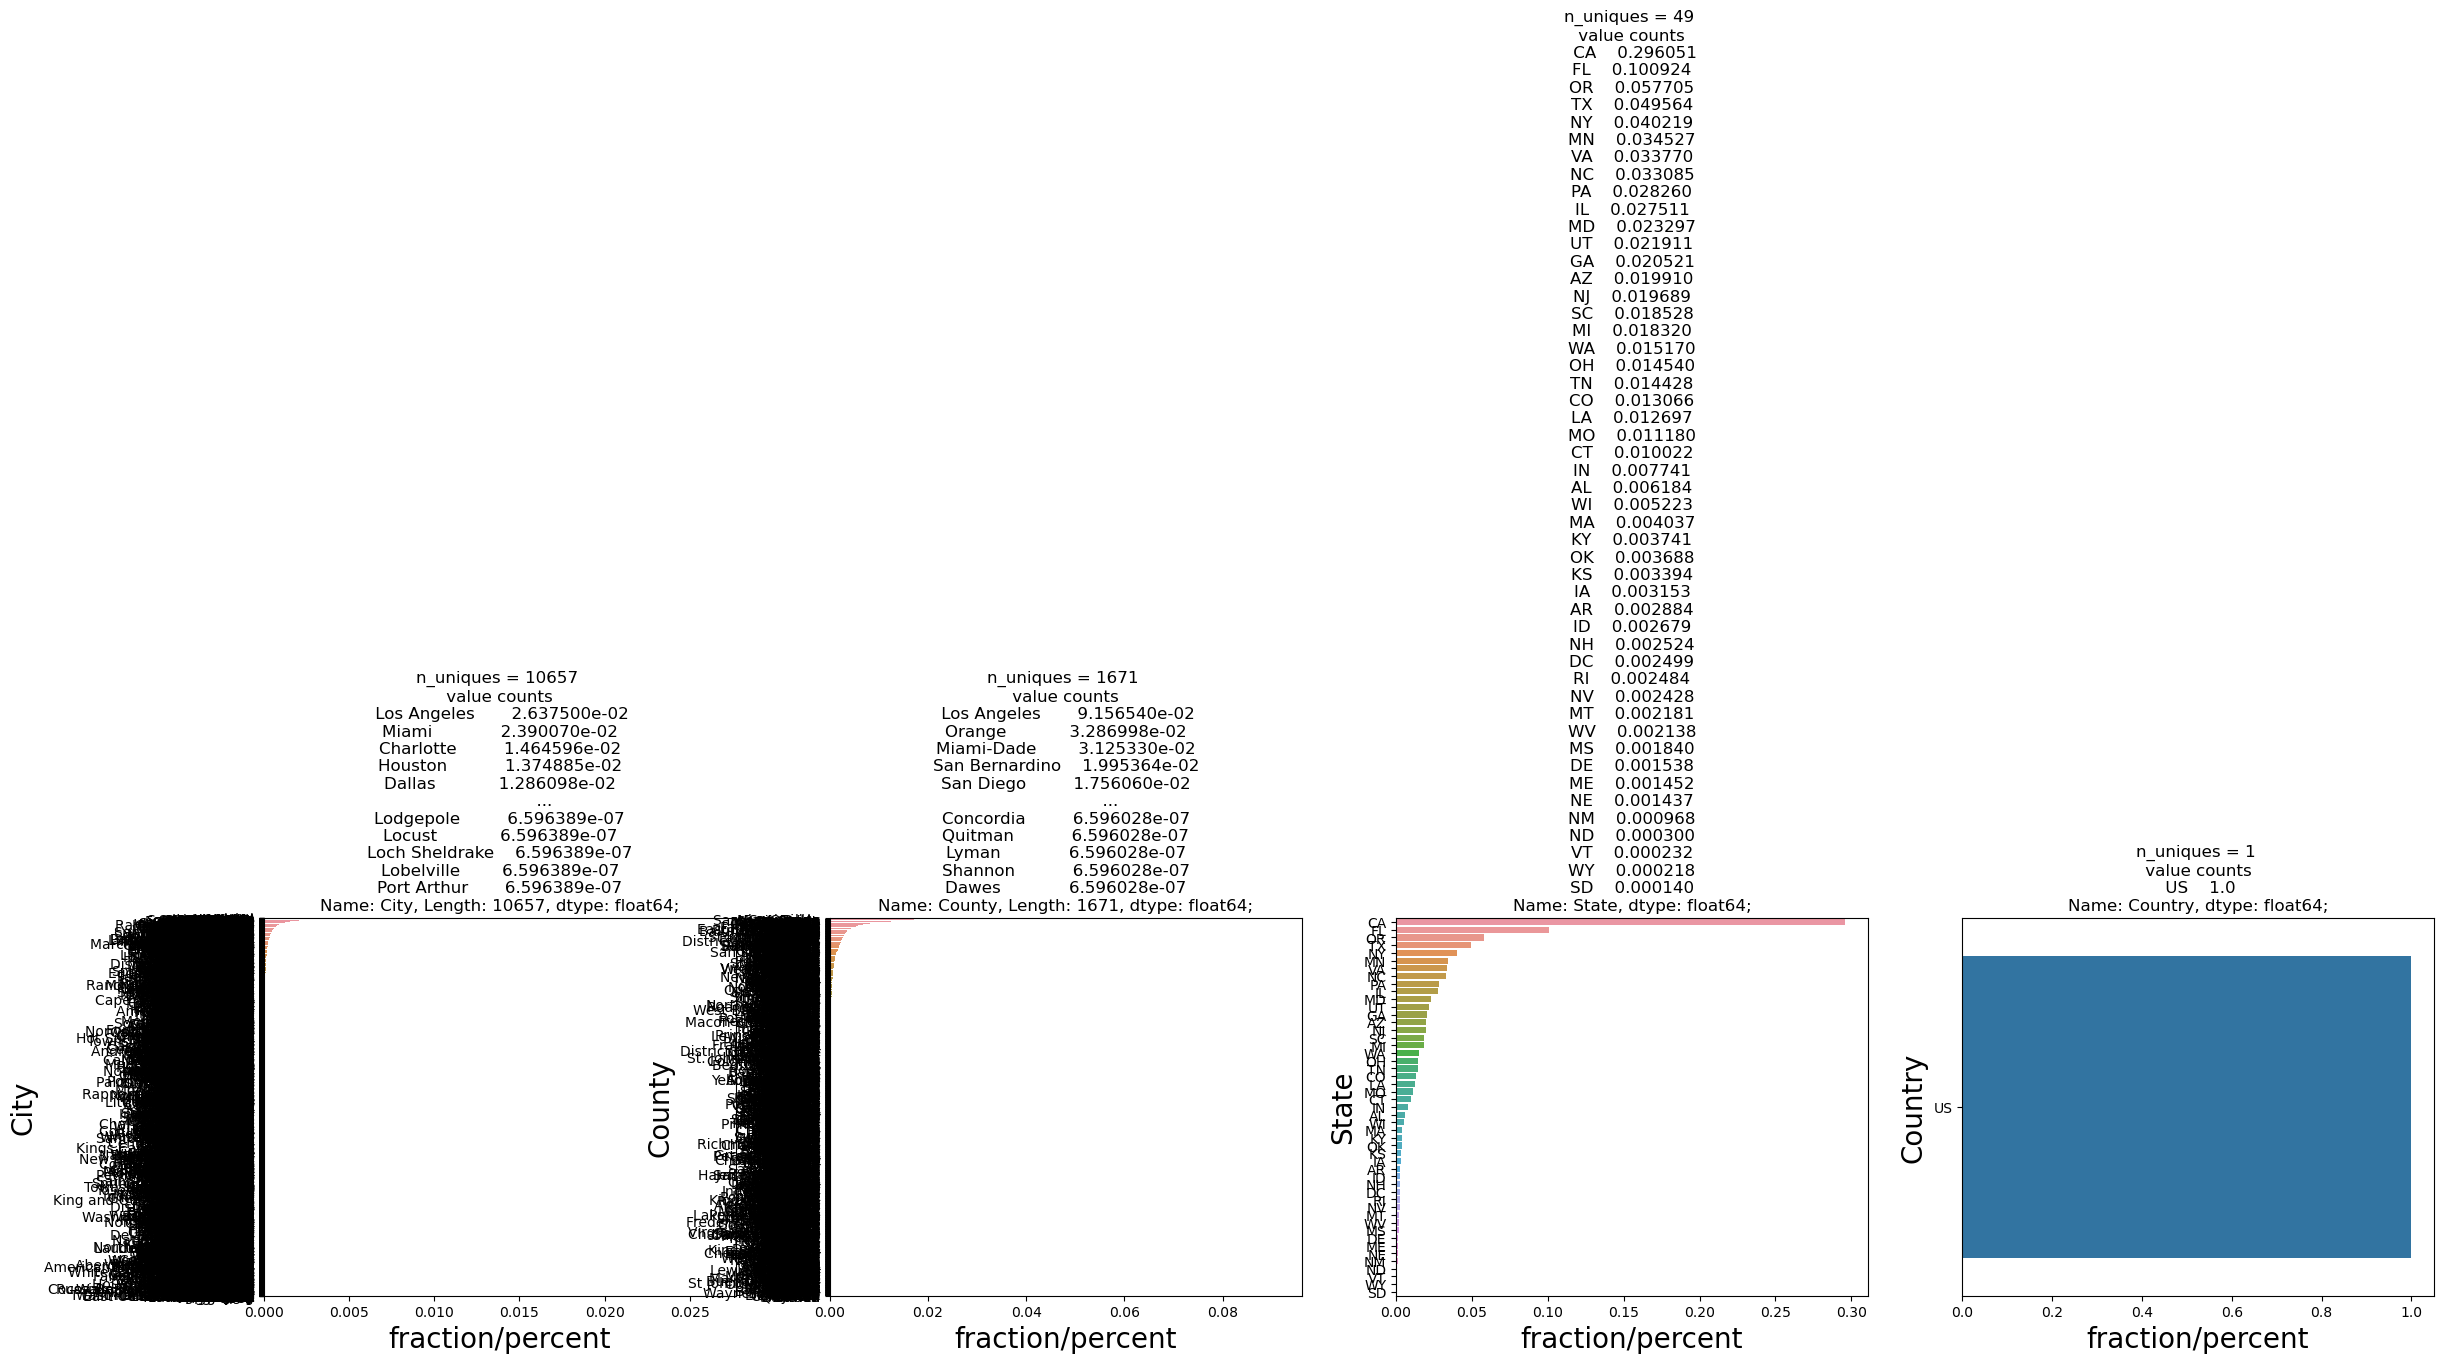

In [54]:
UVA_Category(df,Demographics)